In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as con
import sys
import os

import BOPackage

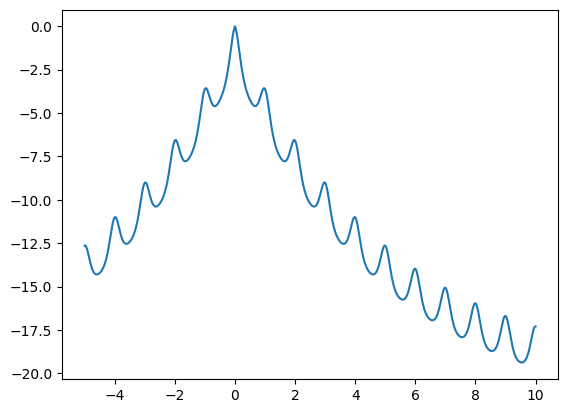

In [26]:
def Ackley(X):
        n = X.shape[1]  # Number of dimensions (should be 20 for this problem)
        
        # Calculate the objective function value for each row in X
        term1 = -20 * np.exp(-0.2 * np.sqrt(np.sum(X**2, axis=1) / n))
        term2 = -np.exp(np.sum(np.cos(2 * np.pi * X), axis=1) / n)
        y = term1 + term2 + 20 + np.e
        
        # Make function negative to find the minimum
        y = -y.reshape(-1, 1)
        
        return y

bounds = np.array([[-5, 10]] * 1)

candidate_x = np.linspace(bounds[0,0], bounds[0,1], 1001, endpoint=True).reshape(1001, 1)

result = Ackley(candidate_x)

# Plot the contour
plot = plt.plot(candidate_x, result)

In [28]:
acquisition_samples = 1
random_sample_size = 20000
dimensions = 1
batch_size = 1

length_scale = 0.3
kappa = 4

bounds = np.array([[-5, 10]] * dimensions)

Kernel = BOPackage.RBF_Kernel_GPU
AcquisitionFunction = BOPackage.UpperConfidenceBound
ObjectiveFunction = Ackley

random_seed = int(np.random.random() * 1000)

bo = BOPackage.BO(KernelFunction=Kernel, 
                length_scale=length_scale, 
                bounds=bounds, 
                AcquisitionFunction=AcquisitionFunction, 
                acquisition_samples=acquisition_samples,
                random_seed=random_seed)

raw_X = bo.GetRandomXBatch(random_sample_size)
raw_y = Ackley(raw_X)
bo.UpdateData(raw_X, raw_y)

raw_X = bo.GetNextXBatch(kappa=kappa, batch_size=batch_size)
raw_y = ObjectiveFunction(np.array(raw_X))
bo.UpdateData(raw_X, raw_y)

print(len(bo.X_data))


!!!Inverting the Kernel !!!
It took 0.2204367995262146 minutes to calculate the kernel matrix.
It took 1.3335455218950907 minutes to invert the kernel.

!!! Generating the next X value !!!
Creating a set of candidate_x points took 0.00010963280995686849 mins.
Using: /GPU:0
Time taken to calculate the mean was 0.005368618170420328 mins.
20001


/Users/jordanlee/Desktop/DPhil/Bayesian/Scaling/BOPackage.py:172: RuntimeWarning: invalid value encountered in sqrt
  candidate_y = self.AcquisitionFunction(mean, np.sqrt(variance), kappa)
